<a href="https://colab.research.google.com/github/vishal-verma27/image2image/blob/main/SDXL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio
!pip install diffusers transformers accelerate safetensors
!pip install huggingface_hub opencv-python pillow
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline
from PIL import Image
from IPython.display import display
from google.colab import files  # If using Google Colab

# Load the SDXL Refiner 1.0 model
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Saving Image YM.png to Image YM (2).png


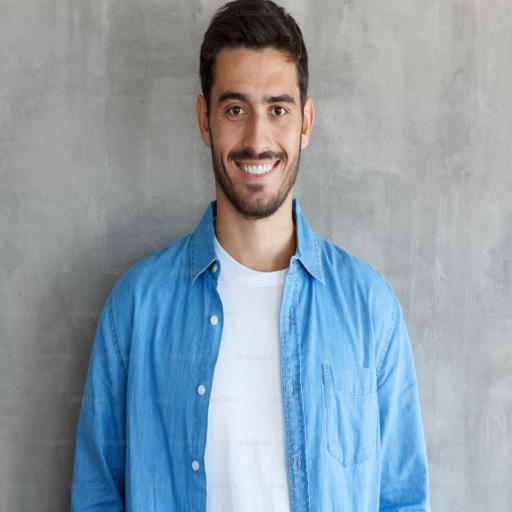

In [6]:
# Upload an image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
init_image = Image.open(file_name).convert("RGB")
init_image = init_image.resize((512, 512))  # Resize for better results
display(init_image)

In [18]:

# Define the prompt for aging
prompt = ("A hyper-realistic portrait of the same person but aged 60 years, "
          "deep wrinkles, white or gray color less hair, fine age spots, slightly sagging cheeks, "
          "realistic lighting, 4K ultra-detailed.")

# Define a negative prompt to avoid unwanted distortions
negative_prompt = ("blurry, distorted face, unrealistic aging, smooth plastic-like skin, "
                   "cartoonish, bad anatomy, extra limbs, low detail.")

  0%|          | 0/35 [00:00<?, ?it/s]

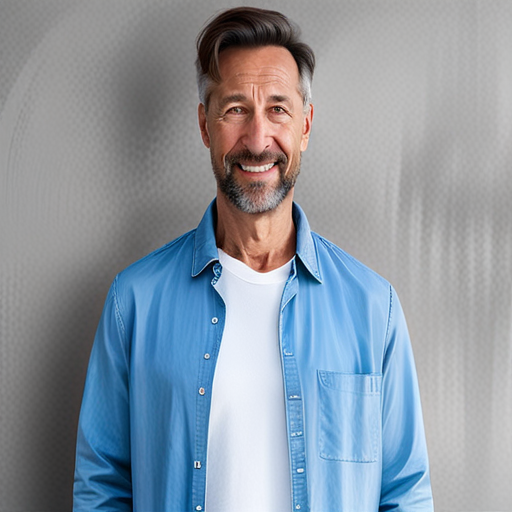

In [29]:
# Generate the aged image
output_image = pipe(
    prompt=prompt,
    image=init_image,
    strength=0.35,  # Higher strength to make noticeable changes
    guidance_scale=20.0,  # Higher adherence to prompt details
    num_inference_steps=100,  # More steps for fine details
    negative_prompt=negative_prompt,
    generator = torch.manual_seed(2024) # or try 1234
).images[0]

# Save and display the aged image
output_image.save("aged_person_sdxl_refiner.png")
display(output_image)